In [2]:
import h5py
import numpy as np
import math
import time

filename_0 = "prts_1400000.h5"

with h5py.File(filename_0, "r") as hf3:
    xb = hf3['xb'][()]
    npatch = hf3['n_patch'][:]

filename_1 = "smaller_prts.h5"

with h5py.File(filename_1, "r") as hf3:
    uz = hf3['uz'][()]
    zz = hf3['z'][()]
    kind = hf3['kind'][()]

def index_count(nptch):
    inx_start = np.zeros(len(nptch))
    inx_end = np.zeros(len(nptch))
    for i in range(len(nptch)):
        inx_start[i] = np.sum(nptch[0:i])
        inx_end[i] = inx_start[i]+nptch[i]-1
    inx_start = inx_start.astype(int)
    inx_end = inx_end.astype(int)
    return inx_start, inx_end

def decimate_npatch(nptch):
    start, end = index_count(nptch)
    deci_patch = np.zeros(len(start))
    for i in range(len(start)):
        deci_patch[i] = math.floor(0.1*end[i])-math.floor(0.1*start[i])
        if start[i]%10 == 0:
            deci_patch[i] = deci_patch[i]+1
    deci_patch = deci_patch.astype(int)
    return deci_patch

deci_npatch = decimate_npatch(npatch[8500:])
print("shape of new npatch array:", np.shape(deci_npatch))
print("sum of deci_npatch:", np.sum(deci_npatch))
print("number of particles in zz array:", len(zz))

def fix_zz(nptch,zz_input,xb_input):
    zz_fixed=[]
    p1 = 0
    for i in range(8500):
        delta = nptch[i] # delta is the number of particles in a patch.
        p2 = p1 + delta  # Here we keep track of the total number of particles, the nth patch lies between the start of the patch p1 and p1+delta
        zz_patch = zz_input[p1:p2, 0].tolist() # we extract only the particles in the patch and put them in a list
        zz_patch_fix = [x+xb_input[8500+i,2] for x in zz_patch] # we then add the position of the patch xb to the relative position of the particles zz to get the absolut position of the particles in this patch
        zz_fixed.extend(zz_patch_fix) # we put the absolute positions of each particle into the new list
        print("npatch index:", i, end='\r')
        p1 = p2
    z_fixed = np.array(zz_fixed)
    return z_fixed
zz_fixed = fix_zz(deci_npatch,zz,xb)

print(np.shape(zz_fixed),"       ")

shape of new npatch array: (8500,)
sum of deci_npatch: 66168482
number of particles in zz array: 66168482
(66168482,)        


<function matplotlib.pyplot.show(close=None, block=None)>

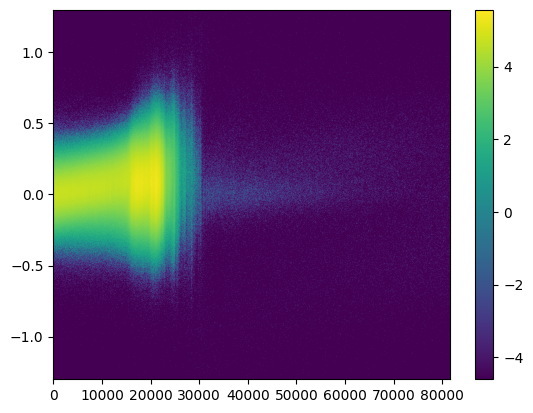

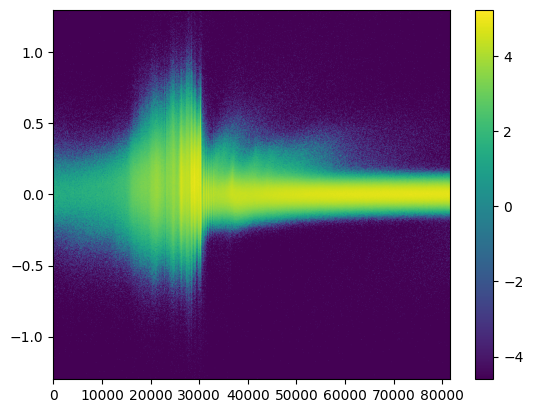

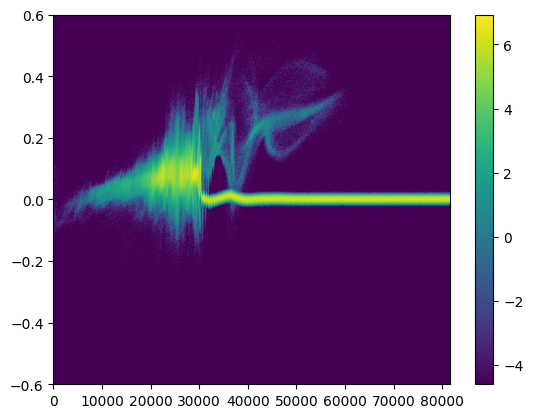

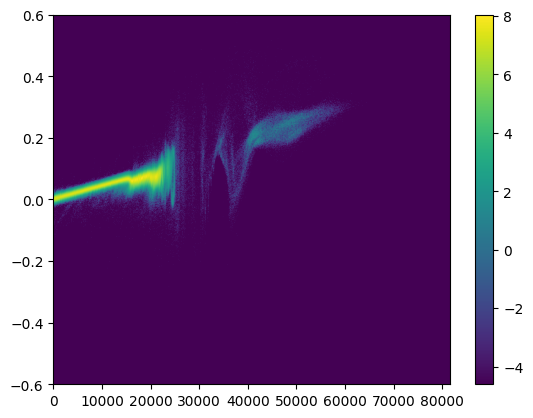

In [15]:
import matplotlib.pyplot as plt

def phasespacehistogram(u_input,z_fixed,kind_input,species=2,BINS=1700,RANGE=[[-0.25, 0.25], [0, 81600]]):
    ls = np.where(kind_input == species)[0] #extract an array of one species from total array of particles
    uz_spec = u_input[ls] 
    zz_spec = z_fixed[ls]
    dummy1 = np.transpose(uz_spec)[0] #for some reason, uz seems to be a column instead of a row. This fixes that
    dummy2 = zz_spec
    histogram = np.histogram2d(dummy1, dummy2, BINS, RANGE)[0] #we input out species-specific data into the histogram
    return histogram

phasehistogram_0 = phasespacehistogram(uz,zz_fixed,kind,0,RANGE=[[-1.3, 1.3], [0, 81600]])
phasehistogram_1 = phasespacehistogram(uz,zz_fixed,kind,1,RANGE=[[-1.3, 1.3], [0, 81600]])
phasehistogram_2 = phasespacehistogram(uz,zz_fixed,kind,2,RANGE=[[-0.6, 0.6], [0, 81600]])
phasehistogram_3 = phasespacehistogram(uz,zz_fixed,kind,3,RANGE=[[-0.6, 0.6], [0, 81600]])

plt.figure(0)
plt.imshow(np.log(phasehistogram_0+0.01), aspect='auto', origin='lower', extent = (0,81600,-1.3,1.3))
plt.colorbar()
plt.figure(1)
plt.imshow(np.log(phasehistogram_1+0.01), aspect='auto', origin='lower', extent = (0,81600,-1.3,1.3))
plt.colorbar()
plt.figure(2)
plt.imshow(np.log(phasehistogram_2+0.01), aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.figure(3)
plt.imshow(np.log(phasehistogram_3+0.01), aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.show

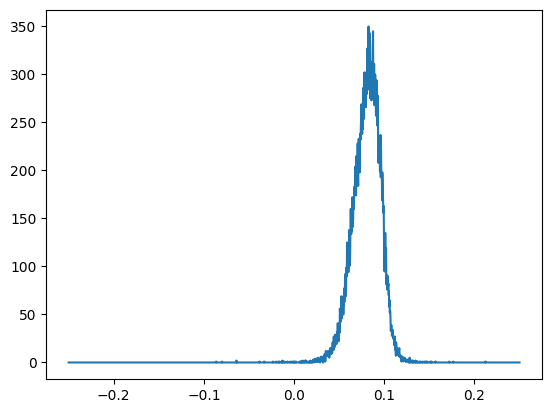

In [4]:
plt.plot(np.linspace(-0.25,0.25,num=1700), phasehistogram_3[:,460])

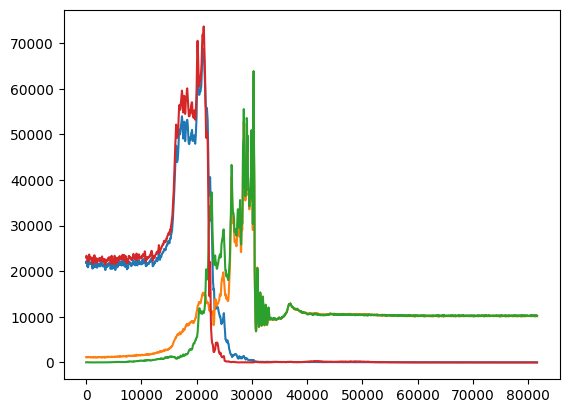

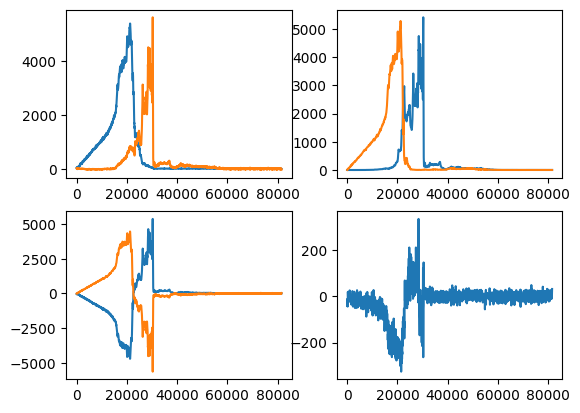

In [6]:
p_space = np.linspace(-0.6,0.6,num=1700)

def rho(histogram):
    pz=[]
    for i in range(len(histogram[0,:])):
        pz.append(np.sum(histogram[:,i]))
    return pz
rho_0 = rho(phasehistogram_0)
rho_1 = rho(phasehistogram_1)
rho_2 = rho(phasehistogram_2)
rho_3 = rho(phasehistogram_3)

plt.figure(0)
plt.plot(np.linspace(0,81600,num=1700), rho_0)
plt.plot(np.linspace(0,81600,num=1700), rho_1)
plt.plot(np.linspace(0,81600,num=1700), rho_2)
plt.plot(np.linspace(0,81600,num=1700), rho_3)

def pz(histogram):
    pz=[]
    for i in range(len(histogram[0,:])):
        pz.append(np.sum(np.multiply(p_space,histogram[:,i])))
    return pz
pz_0 = pz(phasehistogram_0)
pz_1 = pz(phasehistogram_1)
pz_2 = pz(phasehistogram_2)
pz_3 = pz(phasehistogram_3)

plt.figure(1)
plt.subplot(2,2,1)
plt.plot(np.linspace(0,81600,num=1700), pz_0)
plt.plot(np.linspace(0,81600,num=1700), pz_1)

plt.subplot(2,2,2)
plt.plot(np.linspace(0,81600,num=1700), pz_2)
plt.plot(np.linspace(0,81600,num=1700), pz_3)

jz_tar = np.add(np.array(pz_2),np.array(pz_0)*-1)
jz_am = np.add(np.array(pz_3),np.array(pz_1)*-1)
jz_total = np.add(jz_tar, jz_am)

plt.subplot(2,2,3)
plt.plot(np.linspace(0,81600,num=1700), jz_tar)
plt.plot(np.linspace(0,81600,num=1700), jz_am)

plt.subplot(2,2,4)
plt.plot(np.linspace(0,81600,num=1700), jz_total)
plt.show()

-0.033683972840663046


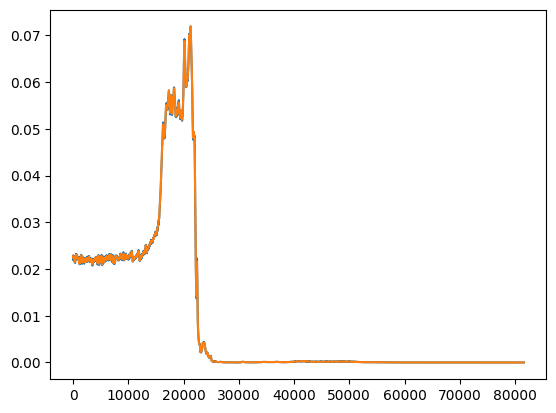

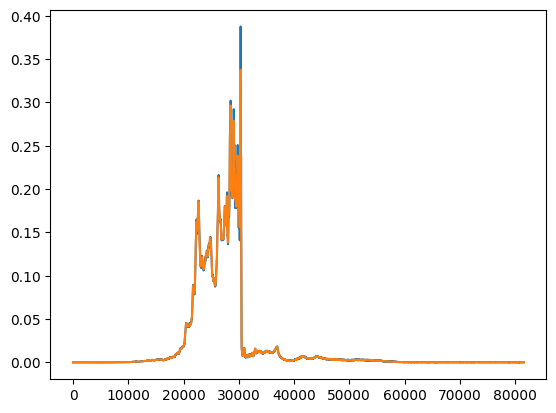

In [13]:
filename_1 = "moments_1400000.h5"
with h5py.File(filename_1, "r") as f:
    hf2 = h5py.File(filename_1, 'r')
    pz_e_am = hf2.get('pz_e_am')[()]
    pz_e_tar = hf2.get('pz_e_tar')[()]
    pz_i_am = hf2.get('pz_i_am')[()]
    pz_i_tar = hf2.get('pz_i_tar')[()]

    rho_e_am = hf2.get('rho_e_am')[()]
    rho_e_tar = hf2.get('rho_e_tar')[()]
    rho_i_am = hf2.get('rho_i_am')[()]
    rho_i_tar = hf2.get('rho_i_tar')[()]

rho_e_am_ave = np.zeros(8500)
rho_e_tar_ave = np.zeros(8500)
rho_i_am_ave = np.zeros(8500)
rho_i_tar_ave = np.zeros(8500)

pz_e_am_ave = np.zeros(8500)
pz_e_tar_ave = np.zeros(8500)
pz_i_am_ave = np.zeros(8500)
pz_i_tar_ave = np.zeros(8500)

for i in range(8500):
    rho_e_am_ave[i] = (1/32)*(1/32)*np.sum(rho_e_am[272000+32*i:272000+32*i+32:,0:32])
    rho_e_tar_ave[i] = (1/32)*(1/32)*np.sum(rho_e_tar[272000+32*i:272000+32*i+32:,0:32])
    rho_i_am_ave[i] = (1/32)*(1/32)*np.sum(rho_i_am[272000+32*i:272000+32*i+32:,0:32])
    rho_i_tar_ave[i] = (1/32)*(1/32)*np.sum(rho_i_tar[272000+32*i:272000+32*i+32:,0:32])

    pz_e_am_ave[i] = (1/32)*(1/32)*np.sum(pz_e_am[272000+32*i:272000+32*i+32:,0:32])
    pz_e_tar_ave[i] = (1/32)*(1/32)*np.sum(pz_e_tar[272000+32*i:272000+32*i+32:,0:32])
    pz_i_am_ave[i] = (1/32)*(1/32)*np.sum(pz_i_am[272000+32*i:272000+32*i+32:,0:32])
    pz_i_tar_ave[i] = (1/32)*(1/32)*np.sum(pz_i_tar[272000+32*i:272000+32*i+32:,0:32])

print(np.sum(rho_e_am[272000,0:32]))

plt.figure(0)
#plt.plot(np.linspace(0,81600,num=8500), -rho_e_am_ave)
#plt.plot(np.linspace(0,81600,num=8500), -rho_e_tar_ave)
#plt.plot(np.linspace(0,81600,num=8500), rho_i_am_ave)
plt.plot(np.linspace(0,81600,num=8500), rho_i_tar_ave)
plt.plot(np.linspace(0,81600,num=1700), (1/2000)*(10)*(1/32)*(1/32)*(1/5)*np.array(rho_3))

plt.figure(1)
#plt.plot(np.linspace(0,81600,num=8500), 32*32*2000*5*0.1*rho_i_am_ave)
#plt.plot(np.linspace(0,81600,num=1700), rho_2)
plt.plot(np.linspace(0,81600,num=8500), pz_i_am_ave)
plt.plot(np.linspace(0,81600,num=1700), (0.032)*(10)*(1/32)*(1/32)*(1/5)*np.array(pz_2))

#plt.plot(np.linspace(0,81600,num=1700), np.add(rho_0,np.add(rho_1,np.add(rho_2,rho_3))))
#plt.plot(np.linspace(0,81600,num=8500), 5*deci_npatch)

#plt.figure(1)
#plt.plot(np.linspace(0,81600,num=27200), pz_e_am[27200:,16])
#plt.plot(np.linspace(0,81600,num=27200), pz_e_tar[27200:,16])

#plt.figure(2)
#plt.plot(np.linspace(0,81600,num=27200), pz_i_am[27200:,16])
#plt.plot(np.linspace(0,81600,num=27200), pz_i_tar[27200:,16])

plt.show()

In [87]:
plt.figure(0)
plt.plot(np.linspace(0,81600,num=8500), S[0,0])
plt.plot(np.linspace(0,81600,num=8500),100*0.3*9.6*9.6*Txx_i_am)

plt.figure(1)
plt.plot(np.linspace(0,81600,num=8500), S[1,1])
plt.plot(np.linspace(0,81600,num=8500),2765*Tyy_i_am)

plt.figure(2)
plt.plot(np.linspace(0,81600,num=8500), S[2,2])
plt.plot(np.linspace(0,81600,num=8500),2765*Tzz_i_am)

plt.figure(3)
plt.plot(np.linspace(0,81600,num=8500), S[0,1])
plt.plot(np.linspace(0,81600,num=8500),2765*Txy_i_am)
plt.show

NameError: name 'S' is not defined

<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

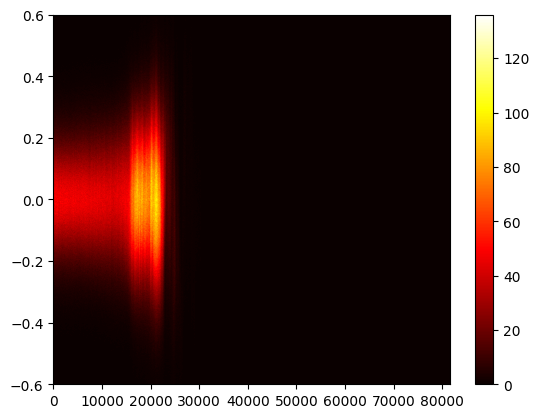

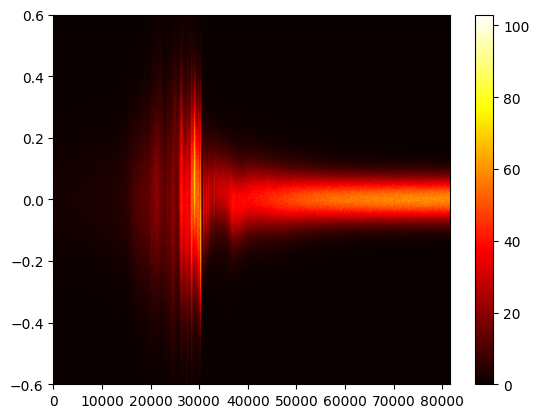

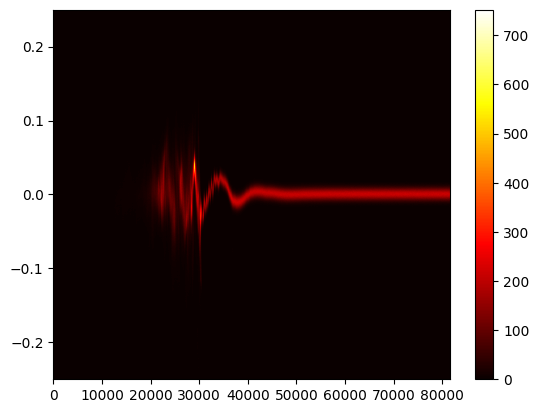

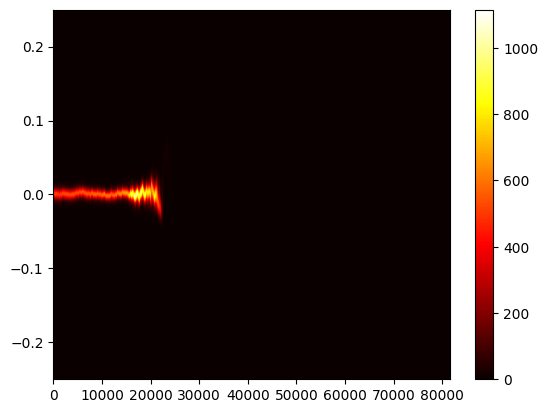

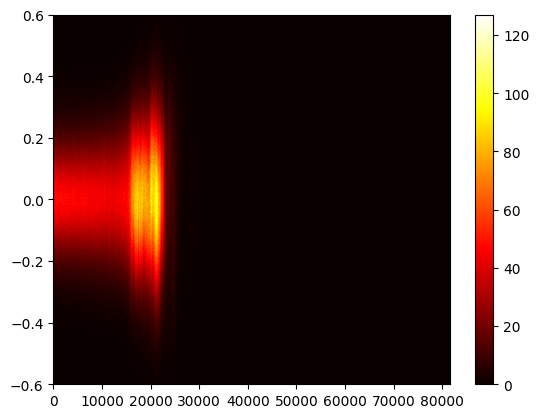

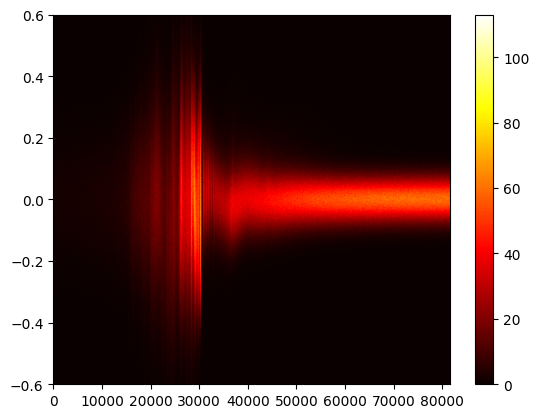

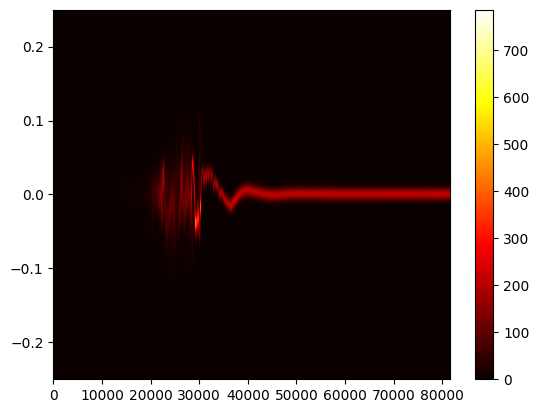

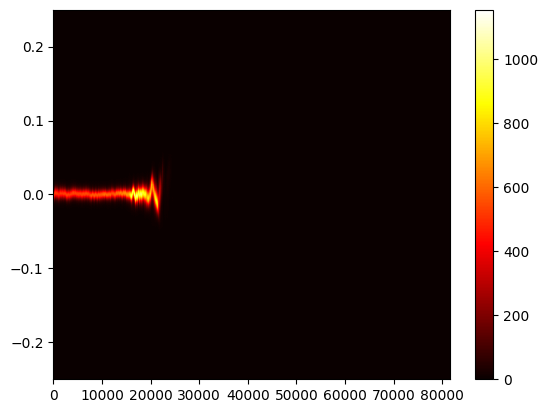

In [ ]:
filename_1 = "smaller_prts.h5"

with h5py.File(filename_1, "r") as hf3:
    ux = hf3['ux'][()]
    uy = hf3['uy'][()]

phasehistogram_x0 = phasespacehistogram(ux,zz_fixed,kind,0,RANGE=[[-0.6, 0.6], [0, 81600]])
phasehistogram_x1 = phasespacehistogram(ux,zz_fixed,kind,1,RANGE=[[-0.6, 0.6], [0, 81600]])
phasehistogram_x2 = phasespacehistogram(ux,zz_fixed,kind,2)
phasehistogram_x3 = phasespacehistogram(ux,zz_fixed,kind,3)

phasehistogram_y0 = phasespacehistogram(uy,zz_fixed,kind,0,RANGE=[[-0.6, 0.6], [0, 81600]])
phasehistogram_y1 = phasespacehistogram(uy,zz_fixed,kind,1,RANGE=[[-0.6, 0.6], [0, 81600]])
phasehistogram_y2 = phasespacehistogram(uy,zz_fixed,kind,2)
phasehistogram_y3 = phasespacehistogram(uy,zz_fixed,kind,3)

plt.figure(0)
plt.imshow(phasehistogram_x0, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.figure(1)
plt.imshow(phasehistogram_x1, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.figure(2)
plt.imshow(phasehistogram_x2, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.25,0.25))
plt.colorbar()
plt.figure(3)
plt.imshow(phasehistogram_x3, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.25,0.25))
plt.colorbar()

plt.figure(4)
plt.imshow(phasehistogram_y0, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.figure(5)
plt.imshow(phasehistogram_y1, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.6,0.6))
plt.colorbar()
plt.figure(6)
plt.imshow(phasehistogram_y2, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.25,0.25))
plt.colorbar()
plt.figure(7)
plt.imshow(phasehistogram_y3, cmap='hot', aspect='auto', origin='lower', extent = (0,81600,-0.25,0.25))
plt.colorbar()

plt.show

C:\Users\rayne\AppData\Local\Temp\ipykernel_12388\3331135470.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pz.append(np.trapz(np.multiply(p_space,histogram[:,i]),p_space))


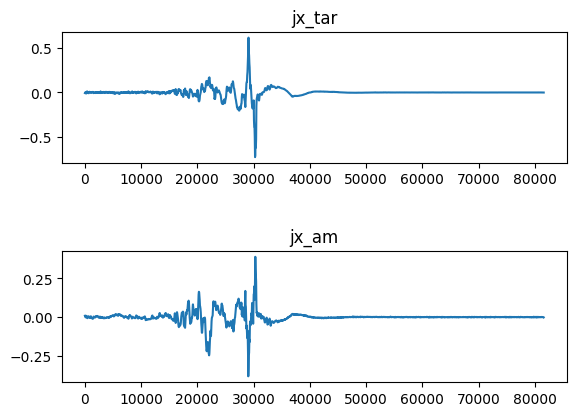

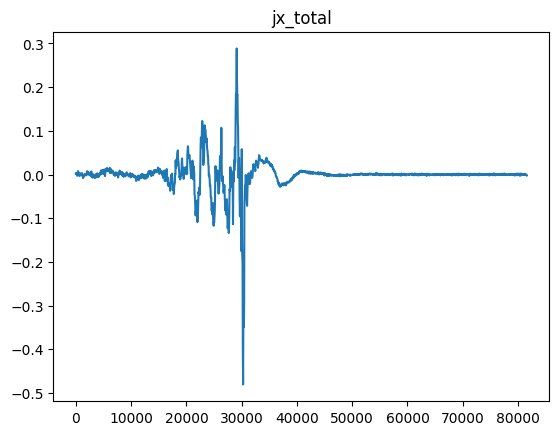

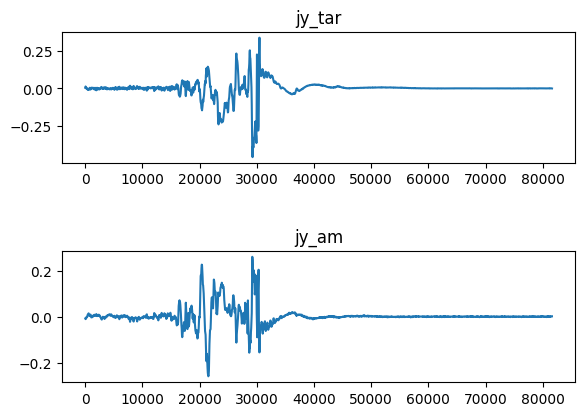

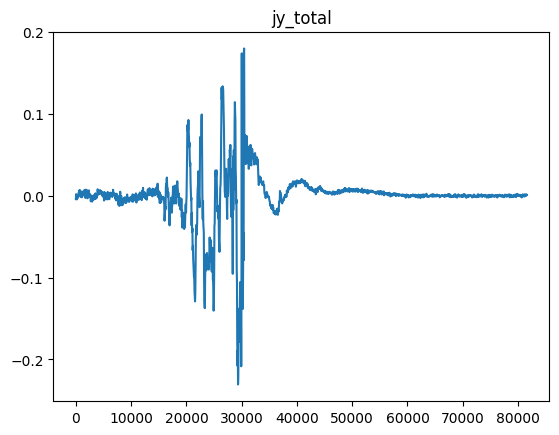

In [ ]:
px_0 = pz(phasehistogram_x0)
px_1 = pz(phasehistogram_x1)
px_2 = pz(phasehistogram_x2)
px_3 = pz(phasehistogram_x3)

py_0 = pz(phasehistogram_y0)
py_1 = pz(phasehistogram_y1)
py_2 = pz(phasehistogram_y2)
py_3 = pz(phasehistogram_y3)

jx_tar = np.add(np.array(px_2),np.array(px_0)*-1)
jx_am = np.add(np.array(px_3),np.array(px_1)*-1)
jx_total = np.add(jx_tar, jx_am)

jy_tar = np.add(np.array(py_2),np.array(py_0)*-1)
jy_am = np.add(np.array(py_3),np.array(py_1)*-1)
jy_total = np.add(jy_tar, jy_am)


plt.figure(0)
plt.subplot(2,1,1)
plt.plot(np.linspace(0,81600,num=1700), jx_tar)
plt.title("jx_tar")
plt.subplot(2,1,2)
plt.plot(np.linspace(0,81600,num=1700), jx_am)
plt.title("jx_am")
plt.tight_layout(pad=3)

plt.figure(1)
plt.plot(np.linspace(0,81600,num=1700), jx_total)
plt.title("jx_total")

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(np.linspace(0,81600,num=1700), jy_tar)
plt.title("jy_tar")
plt.subplot(2,1,2)
plt.plot(np.linspace(0,81600,num=1700), jy_am)
plt.title("jy_am")
plt.tight_layout(pad=3)

plt.figure(3)
plt.plot(np.linspace(0,81600,num=1700), jy_total)
plt.title("jy_total")
plt.show()

In [ ]:
def four_phasespace(ux_input,uy_input,uz_input,z_fixed,kind_input,species=2,BINS=[120,120,120,120],RANGE=[[-0.25, 0.25],[-0.25, 0.25],[-0.25, 0.25],[0, 81600]]):
    ls = np.where(kind_input == species)[0] #extract an array of one species from total array of particles
    ux_spec = ux_input[ls] 
    uy_spec = uy_input[ls] 
    uz_spec = uz_input[ls]
    zz_spec = z_fixed[ls]
    dummy1 = np.transpose(ux_spec)[0] #for some reason, uz seems to be a column instead of a row. This fixes that
    dummy2 = np.transpose(uy_spec)[0]
    dummy3 = np.transpose(uz_spec)[0]
    dummy4 = zz_spec
    histogram = np.histogramdd((dummy1, dummy2, dummy3, dummy4), BINS, RANGE)[0] #we input out species-specific data into the histogram
    return histogram

four_phasehistogram_0 = four_phasespace(ux,uy,uz,zz_fixed,kind,species=2)

(200, 200)


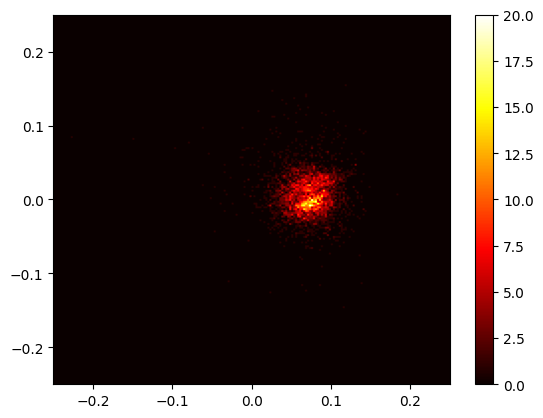

In [ ]:
def uxuy_phasespace(Z,ux_input,uy_input,kind_input,nptch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)]):
    start =np.sum(nptch[0:Z])
    end = np.sum(nptch[0:Z+1])
    ls = np.where(kind_input[start:end] == species)[0] #extract an array of one species from total array of particles
    ux_cut = ux_input[start:end]
    uy_cut = uy_input[start:end]
    ux_spec = ux_cut[ls] 
    uy_spec = uy_cut[ls]
    dummy1 = np.transpose(ux_spec)[0] #for some reason, uz seems to be a column instead of a row. This fixes that
    dummy2 = np.transpose(uy_spec)[0]
    histogram = np.histogramdd([dummy1, dummy2], BINS, RANGE)[0] #we input out species-specific data into the histogram
    return histogram

uxuy_histogram_2500 = uxuy_phasespace(2300,ux,uz,kind,deci_npatch,species=2)
plt.figure(0)
plt.imshow(uxuy_histogram_2500, cmap='hot', aspect='auto', origin='lower', extent = (-0.25,0.25,-0.25,0.25))
plt.colorbar()

print(np.shape(uxuy_histogram_2500))

(200, 200)


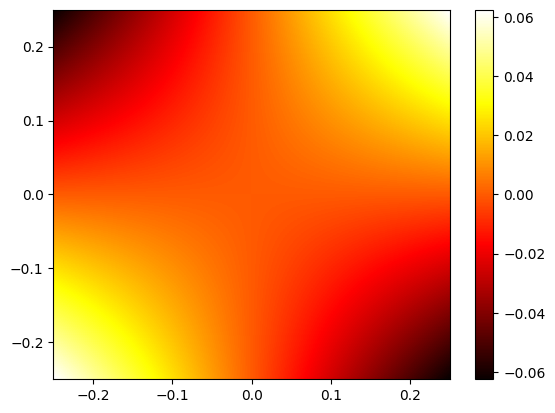

In [ ]:
def vspacegrid(RANGE=[[-0.25,0.25],[-0.25,0.25]],BINS=(200,200)):
    RANGE = np.array(RANGE)
    xspace = np.linspace(RANGE[0,0],RANGE[0,1],BINS[0])
    yspace = np.linspace(RANGE[1,0],RANGE[1,1],BINS[1])
    grid = np.zeros(BINS)
    for i in range(BINS[0]):
        for j in range(BINS[1]):
            grid[i,j] = xspace[i]*yspace[j]
    return grid

vgrid = vspacegrid()
plt.figure(0)
plt.imshow(vgrid, cmap='hot', aspect='auto', origin='lower', extent = (-0.25,0.25,-0.25,0.25))
plt.colorbar()

print(np.shape(vgrid))

In [ ]:
def second_moment(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)]):
    xy = uxuy_phasespace(Z,ux_input,uy_input,kind_input,nptch,species=species,BINS=BINS,RANGE=RANGE)
    xz = uxuy_phasespace(Z,ux_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=RANGE)
    yz = uxuy_phasespace(Z,uy_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=RANGE)
    v_grid = vspacegrid(RANGE=RANGE,BINS=BINS)
    vvxy = np.multiply(xy,v_grid)
    vvxz = np.multiply(xz,v_grid)
    vvyz = np.multiply(yz,v_grid)
    XX = uxuy_phasespace(Z,ux_input,ux_input,kind_input,nptch,species=2,BINS=BINS,RANGE=RANGE)
    YY = uxuy_phasespace(Z,uy_input,uy_input,kind_input,nptch,species=2,BINS=BINS,RANGE=RANGE)
    ZZ = uxuy_phasespace(Z,uz_input,uz_input,kind_input,nptch,species=2,BINS=BINS,RANGE=RANGE)
    vvxx = np.multiply(XX,v_grid)
    vvyy = np.multiply(YY,v_grid)
    vvzz = np.multiply(ZZ,v_grid)
    VVxx = np.sum(vvxx)/nptch[Z]
    VVyy = np.sum(vvyy)/nptch[Z]
    VVzz = np.sum(vvzz)/nptch[Z]
    VVxy = np.sum(vvxy)/nptch[Z]
    VVxz = np.sum(vvxz)/nptch[Z]
    VVyz = np.sum(vvyz)/nptch[Z]
    T_output = [[VVxx,VVxy,VVxz],[VVxy,VVyy,VVyz],[VVxz,VVyz,VVzz]]
    return T_output

Tt = second_moment(3000,ux,uy,uz,kind,deci_npatch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)])
print(Tt)

[[np.float64(0.0008513098326041865), np.float64(0.0001304982882557085), np.float64(0.00043176483357376216)], [np.float64(0.0001304982882557085), np.float64(0.0010127242739724923), np.float64(0.000783347026061971)], [np.float64(0.00043176483357376216), np.float64(0.000783347026061971), np.float64(0.004276290450854495)]]


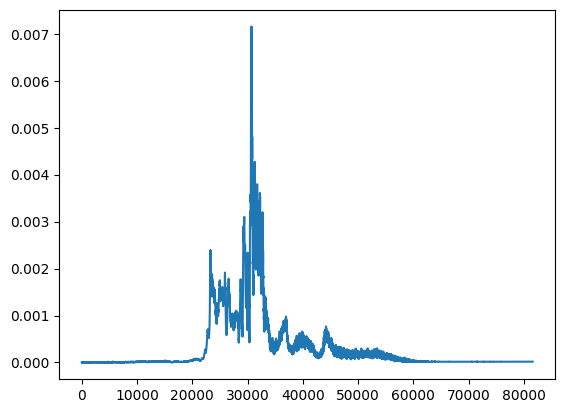

In [ ]:
def temperature_array(ux_input,uy_input,uz_input,kind_input,nptch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)]):
    temp_z =np.zeros([3,3,len(nptch)])
    for Z in range(len(nptch)):
        temp_z[:,:,Z] = second_moment(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=RANGE)
        print("npatch index:", Z, end='\r')
    return temp_z

T = temperature_array(ux,uy,uz,kind,deci_npatch,species=2,BINS=[400,400],RANGE=[(-0.5,0.5),(-0.5,0.5)])
plt.plot(np.linspace(0,81600,num=8500), T[1,1])


<function matplotlib.pyplot.show(close=None, block=None)>

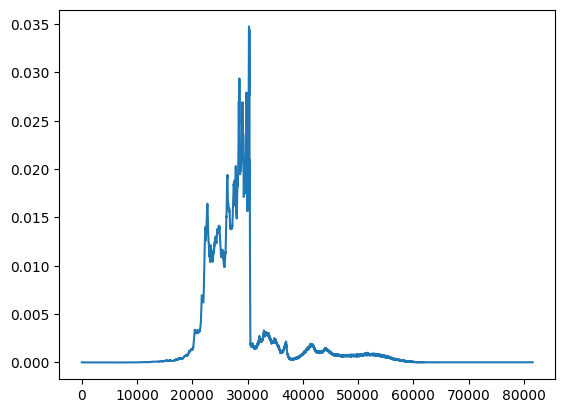

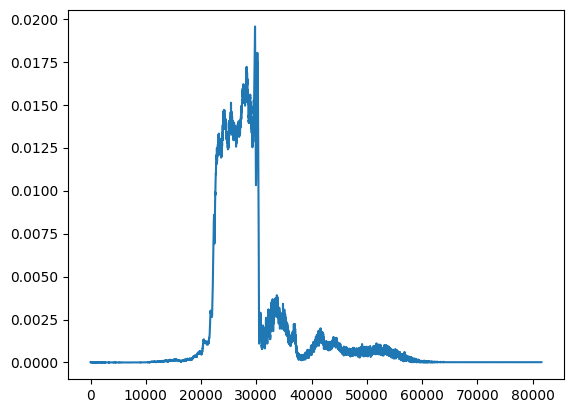

In [ ]:
filename2 = "moments_1400000.h5"
with h5py.File(filename2, "r") as f:
    hf2 = h5py.File(filename2, 'r')
    txx_i_am = hf2.get('tzz_i_am')[()]
Txx_i_am = np.zeros(8500)
for i in range(8500):
    Txx_i_am[i] = (1/32)*(1/32)*np.sum(txx_i_am[272000+32*i:272000+32*i+32:,0:32])
np.shape(Txx_i_am)
plt.figure(0)
plt.plot(np.linspace(0,81600,num=8500),Txx_i_am)
plt.figure(1)
plt.plot(np.linspace(0,81600,num=8500), T[2,2])
plt.show

(8500,)
(8500,)


<function matplotlib.pyplot.show(close=None, block=None)>

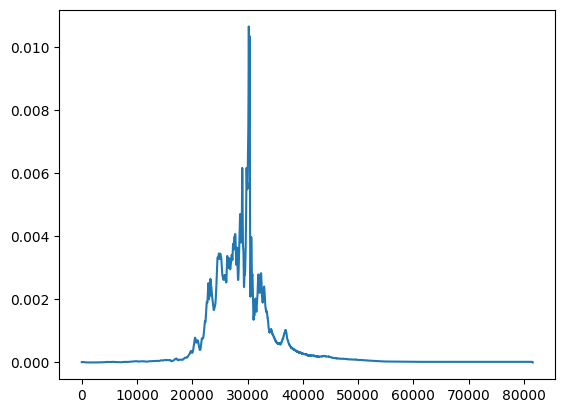

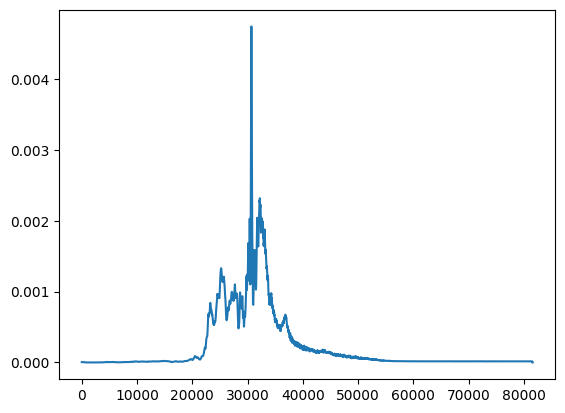

In [ ]:
def rolling_average(interval,arr):
    moving_averages = np.zeros(len(arr))
    for j in range(len(arr)-interval):
        window = arr[j:j+interval]
        window_average = (1/interval)*np.sum(window)
        moving_averages[j] = window_average
    return moving_averages

Txx_i_am_smooth = rolling_average(10,Txx_i_am)
Txx_smooth = rolling_average(10,T[0,0])

print(np.shape(Txx_smooth))
print(np.shape(Txx_i_am_smooth))

plt.figure(0)
plt.plot(np.linspace(0,81600,num=8500),Txx_i_am_smooth)
plt.figure(1)
plt.plot(np.linspace(0,81600,num=8500),Txx_smooth)
plt.show

In [ ]:
def raw_temperature(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=2):
    start =np.sum(nptch[0:Z])
    end = np.sum(nptch[0:Z+1])
    ls = np.where(kind_input[start:end] == species)[0] #extract an array of one species from total array of particles
    ux_cut = ux_input[start:end]
    uy_cut = uy_input[start:end]
    uz_cut = uz_input[start:end] 
    ux_mid = ux_cut[ls] 
    uy_mid = uy_cut[ls]
    uz_mid = uz_cut[ls]
    xmean = np.mean(ux_mid)
    ymean = np.mean(uy_mid)
    zmean = np.mean(uz_mid)
    ux_spec = [i - xmean for i in ux_mid]
    uy_spec = [i - ymean for i in uy_mid]
    uz_spec = [i - zmean for i in uz_mid]
    temperature_xy = np.multiply(ux_spec, uy_spec)
    temperature_xy = (np.sum(temperature_xy)/nptch[Z])
    temperature_xz = np.multiply(ux_spec, uz_spec)
    temperature_xz = (np.sum(temperature_xz)/nptch[Z])
    temperature_yz = np.multiply(uy_spec, uz_spec)
    temperature_yz = (np.sum(temperature_yz)/nptch[Z])
    temperature_xx = np.multiply(ux_spec, ux_spec)
    temperature_xx = (np.sum(temperature_xx)/nptch[Z])
    temperature_yy = np.multiply(uy_spec, uy_spec)
    temperature_yy = (np.sum(temperature_yy)/nptch[Z])
    temperature_zz = np.multiply(uz_spec, uz_spec)
    temperature_zz = (np.sum(temperature_zz)/nptch[Z])
    
    temperature = [[temperature_xx,temperature_xy,temperature_xz],[temperature_xy,temperature_yy,temperature_yz],[temperature_xz,temperature_yz,temperature_zz]]
    return temperature

Tt = second_moment(3000,ux,uy,uz,kind,deci_npatch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)])
print(Tt)

[[np.float64(0.0009968898890679568), np.float64(0.0003946401426439527), np.float64(0.001640588965660546)], [np.float64(0.0003946401426439527), np.float64(0.0015104597057446667), np.float64(0.0028566872402483578)], [np.float64(0.001640588965660546), np.float64(0.0028566872402483578), np.float64(0.0125007846277838)]]


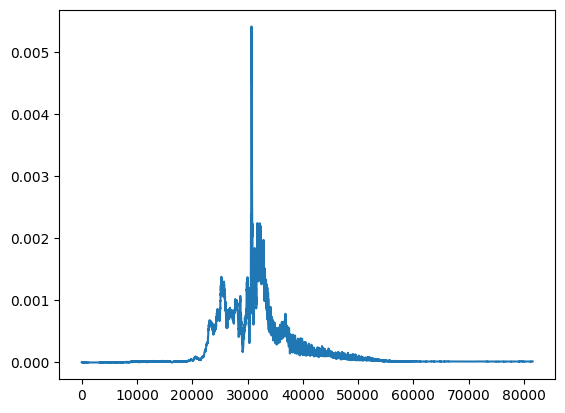

In [ ]:
def raw_temperature_array(ux_input,uy_input,uz_input,kind_input,nptch,species=2):
    temp_z =np.zeros([3,3,len(nptch)])
    for Z in range(len(nptch)):
        temp_z[:,:,Z] = raw_temperature(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=species)
        print("npatch index:", Z, end='\r')
    return temp_z

T_raw = raw_temperature_array(ux,uy,uz,kind,deci_npatch,species=2)
plt.plot(np.linspace(0,81600,num=8500), T_raw[0,0])

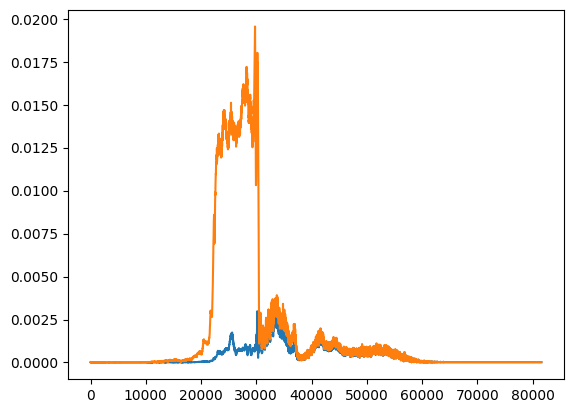

In [ ]:
plt.plot(np.linspace(0,81600,num=8500), T_raw[2,2])
plt.plot(np.linspace(0,81600,num=8500), T[2,2])

In [ ]:
def second_moment(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)]):
    start =np.sum(nptch[0:Z])
    end = np.sum(nptch[0:Z+1])
    ls = np.where(kind_input[start:end] == species)[0] #extract an array of one species from total array of particles
    ux_cut = ux_input[start:end]
    uy_cut = uy_input[start:end]
    uz_cut = uz_input[start:end] 
    ux_mid = ux_cut[ls] 
    uy_mid = uy_cut[ls]
    uz_mid = uz_cut[ls]
    xmean = np.mean(ux_mid)
    ymean = np.mean(uy_mid)
    zmean = np.mean(uz_mid)
    if -1<xmean<1:
        xmean = xmean
    else:
        xmean = 0
    if -1<ymean<1:
        ymean = ymean
    else:
        ymean = 0
    if -1<zmean<1:
        zmean = zmean
    else:
        zmean = 0
    xy = uxuy_phasespace(Z,ux_input,uy_input,kind_input,nptch,species=species,BINS=BINS,RANGE=np.array(RANGE)+np.array([(xmean,xmean),(ymean,ymean)]))
    xz = uxuy_phasespace(Z,ux_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=np.array(RANGE)+np.array([(xmean,xmean),(zmean,zmean)]))
    yz = uxuy_phasespace(Z,uy_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=np.array(RANGE)+np.array([(ymean,ymean),(zmean,zmean)]))
    v_grid = vspacegrid(RANGE=RANGE,BINS=BINS)
    vvxy = np.multiply(xy,v_grid)
    vvxz = np.multiply(xz,v_grid)
    vvyz = np.multiply(yz,v_grid)
    XX = uxuy_phasespace(Z,ux_input,ux_input,kind_input,nptch,species=2,BINS=BINS,RANGE=np.array(RANGE)+np.array([(xmean,xmean),(xmean,xmean)]))
    YY = uxuy_phasespace(Z,uy_input,uy_input,kind_input,nptch,species=2,BINS=BINS,RANGE=np.array(RANGE)+np.array([(ymean,ymean),(ymean,ymean)]))
    ZZ = uxuy_phasespace(Z,uz_input,uz_input,kind_input,nptch,species=2,BINS=BINS,RANGE=np.array(RANGE)+np.array([(zmean,zmean),(zmean,zmean)]))
    vvxx = np.multiply(XX,v_grid)
    vvyy = np.multiply(YY,v_grid)
    vvzz = np.multiply(ZZ,v_grid)
    VVxx = np.sum(vvxx)/nptch[Z]
    VVyy = np.sum(vvyy)/nptch[Z]
    VVzz = np.sum(vvzz)/nptch[Z]
    VVxy = np.sum(vvxy)/nptch[Z]
    VVxz = np.sum(vvxz)/nptch[Z]
    VVyz = np.sum(vvyz)/nptch[Z]
    T_output = [[VVxx,VVxy,VVxz],[VVxy,VVyy,VVyz],[VVxz,VVyz,VVzz]]
    return T_output

Tt = second_moment(2500,ux,uy,uz,kind,deci_npatch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)])
print(Tt)

[[np.float64(0.0005336883750908184), np.float64(4.449062695513835e-05), np.float64(1.1599370117802187e-05)], [np.float64(4.449062695513835e-05), np.float64(0.0006574952677627933), np.float64(7.206449644684448e-05)], [np.float64(1.1599370117802187e-05), np.float64(7.206449644684448e-05), np.float64(0.0005799774722859527)]]


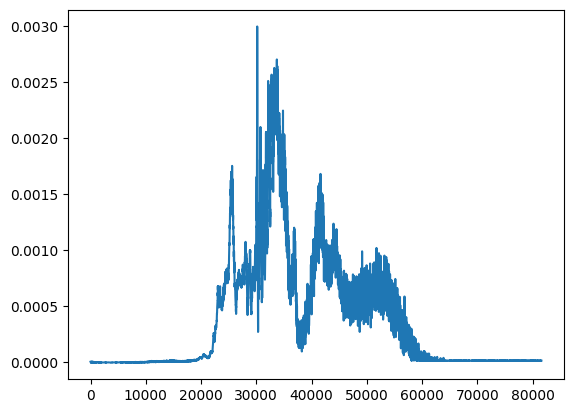

In [ ]:
def temperature_array(ux_input,uy_input,uz_input,kind_input,nptch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)]):
    temp_z =np.zeros([3,3,len(nptch)])
    for Z in range(len(nptch)):
        temp_z[:,:,Z] = second_moment(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=species,BINS=BINS,RANGE=RANGE)
        print("npatch index:", Z, end='\r')
    return temp_z

T = temperature_array(ux,uy,uz,kind,deci_npatch,species=2,BINS=[400,400],RANGE=[(-0.5,0.5),(-0.5,0.5)])
plt.plot(np.linspace(0,81600,num=8500), T[2,2])

In [ ]:
def raw_temperature(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=2):
    start =np.sum(nptch[0:Z])
    end = np.sum(nptch[0:Z+1])
    ls = np.where(kind_input[start:end] == species)[0] #extract an array of one species from total array of particles
    ux_cut = ux_input[start:end]
    uy_cut = uy_input[start:end]
    uz_cut = uz_input[start:end] 
    ux_mid = ux_cut[ls] 
    uy_mid = uy_cut[ls]
    uz_mid = uz_cut[ls]
    xmean = np.mean(ux_mid)
    ymean = np.mean(uy_mid)
    zmean = np.mean(uz_mid)
    ux_spec = [i - xmean for i in ux_mid]
    uy_spec = [i - ymean for i in uy_mid]
    uz_spec = [i - zmean for i in uz_mid]
    temperature_xy = np.multiply(ux_spec, uy_spec)
    temperature_xy = (np.sum(temperature_xy)/nptch[Z])
    temperature_xz = np.multiply(ux_spec, uz_spec)
    temperature_xz = (np.sum(temperature_xz)/nptch[Z])
    temperature_yz = np.multiply(uy_spec, uz_spec)
    temperature_yz = (np.sum(temperature_yz)/nptch[Z])
    temperature_xx = np.multiply(ux_spec, ux_spec)
    temperature_xx = (np.sum(temperature_xx)/nptch[Z])
    temperature_yy = np.multiply(uy_spec, uy_spec)
    temperature_yy = (np.sum(temperature_yy)/nptch[Z])
    temperature_zz = np.multiply(uz_spec, uz_spec)
    temperature_zz = (np.sum(temperature_zz)/nptch[Z])
    
    temperature = [[temperature_xx,temperature_xy,temperature_xz],[temperature_xy,temperature_yy,temperature_yz],[temperature_xz,temperature_yz,temperature_zz]]
    return temperature

Tt = second_moment(3000,ux,uy,uz,kind,deci_npatch,species=2,BINS=[200,200],RANGE=[(-0.25,0.25),(-0.25,0.25)])
print(Tt)

[[np.float64(0.0008079491597966949), np.float64(3.640381297502449e-05), np.float64(1.7924113936496624e-05)], [np.float64(3.640381297502449e-05), np.float64(0.0008439194194652889), np.float64(1.9752914897349483e-05)], [np.float64(1.7924113936496624e-05), np.float64(1.9752914897349483e-05), np.float64(0.0009016562757811285)]]


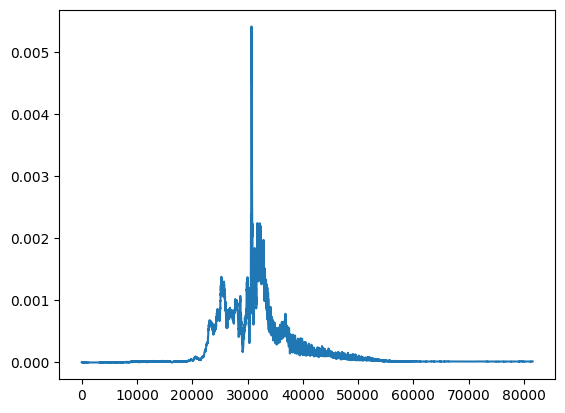

In [ ]:
def raw_temperature_array(ux_input,uy_input,uz_input,kind_input,nptch,species=2):
    temp_z =np.zeros([3,3,len(nptch)])
    for Z in range(len(nptch)):
        temp_z[:,:,Z] = raw_temperature(Z,ux_input,uy_input,uz_input,kind_input,nptch,species=species)
        print("npatch index:", Z, end='\r')
    return temp_z

T_raw = raw_temperature_array(ux,uy,uz,kind,deci_npatch,species=2)
plt.plot(np.linspace(0,81600,num=8500), T_raw[0,0])

<function matplotlib.pyplot.show(close=None, block=None)>

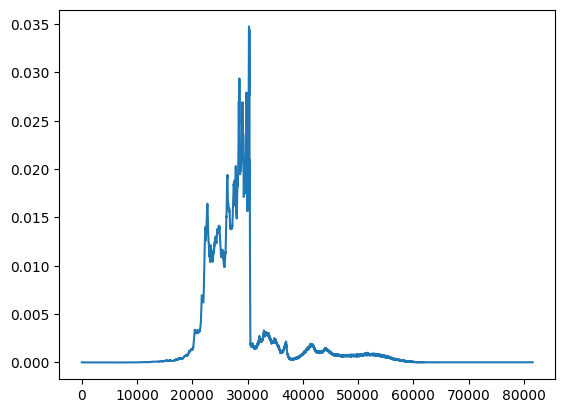

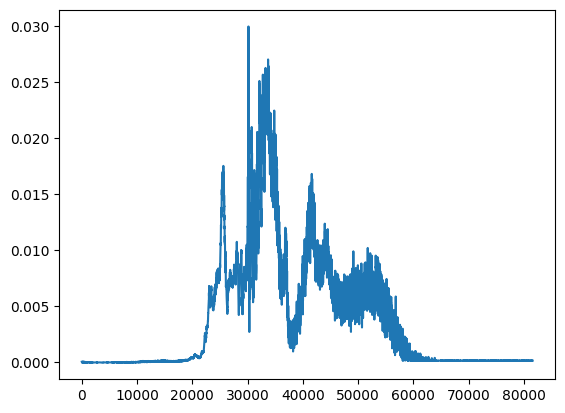

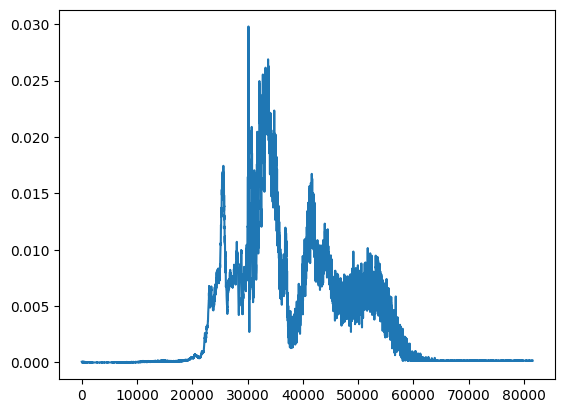

In [ ]:
filename2 = "moments_1400000.h5"
with h5py.File(filename2, "r") as f:
    hf2 = h5py.File(filename2, 'r')
    tzz_i_am = hf2.get('tzz_i_am')[()]
Tzz_i_am = np.zeros(8500)
for i in range(8500):
    Tzz_i_am[i] = (1/32)*(1/32)*np.sum(tzz_i_am[272000+32*i:272000+32*i+32:,0:32])
np.shape(Tzz_i_am)
plt.figure(0)
plt.plot(np.linspace(0,81600,num=8500),Tzz_i_am)
plt.figure(1)
plt.plot(np.linspace(0,81600,num=8500), 10*T[2,2])
plt.figure(2)
plt.plot(np.linspace(0,81600,num=8500), 10*T_raw[2,2])
plt.show